In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree


In [2]:
import os

# Change the working directory to C:\jupyter
os.chdir('C:\\jupyter')

# Verify the current working directory
print(os.getcwd())


C:\jupyter


In [3]:
# Load the datasets from the CSV files
file_path_full =r"C:\\jupyter\bank+marketing\bank\bank-full.csv"
file_path_additional = r"C:\\jupyter\bank+marketing\bank-additional\bank-additional\bank-additional.csv"
# Load the main dataset
data_full = pd.read_csv(file_path_full, sep=';')

# Load the additional dataset (if needed)
data_additional = pd.read_csv(file_path_additional, sep=';')

# Display the first few rows of the datasets
print("Bank Full Dataset:")
print(data_full.head())
print("\nBank Additional Full Dataset:")
print(data_additional.head())


Bank Full Dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Bank Additional Full Dataset:
   age          job  marital          education default  hous

In [4]:
# Check for missing values in the main dataset
print("Missing values in Bank Full Dataset:")
print(data_full.isnull().sum())

# Encode categorical variables in the main dataset
data_full_encoded = pd.get_dummies(data_full, drop_first=True)

# Display the first few rows of the processed dataset
print("\nProcessed Bank Full Dataset:")
print(data_full_encoded.head())


Missing values in Bank Full Dataset:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Processed Bank Full Dataset:
   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...     

In [5]:
# Define the feature variables (X) and the target variable (y)
X = data_full_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target variable after one-hot encoding
y = data_full_encoded['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (31647, 42) (31647,)
Testing set shape: (13564, 42) (13564,)


In [6]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Display the feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
duration               0.275651
balance                0.107016
age                    0.103252
poutcome_success       0.091468
day                    0.080868
pdays                  0.047721
campaign               0.036011
contact_unknown        0.015734
previous               0.014635
month_mar              0.013727
month_jun              0.012830
job_management         0.011769
housing_yes            0.011536
month_oct              0.011459
job_technician         0.010548
loan_yes               0.009931
education_tertiary     0.009630
month_may              0.009491
marital_married        0.009387
education_secondary    0.009372
marital_single         0.008931
month_nov              0.008360
job_blue-collar        0.008181
month_sep              0.007818
month_aug              0.007610
month_jul              0.007180
month_feb              0.006199
month_jan              0.005725
job_self-employed      0.005625
job_student            0.004869
job_services      


Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



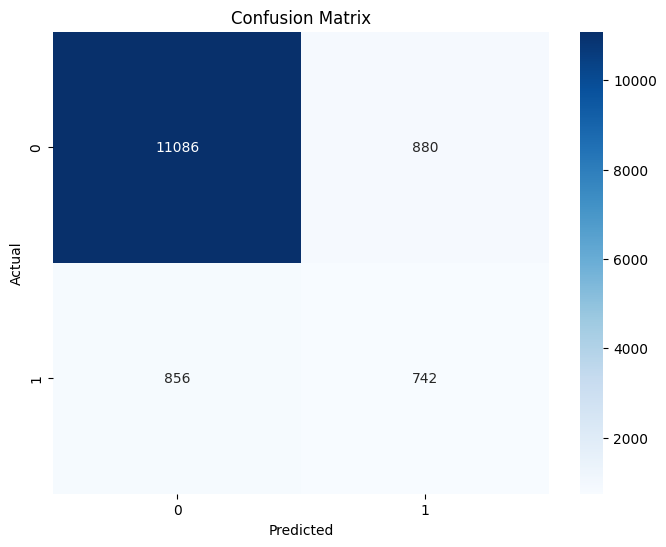

In [7]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


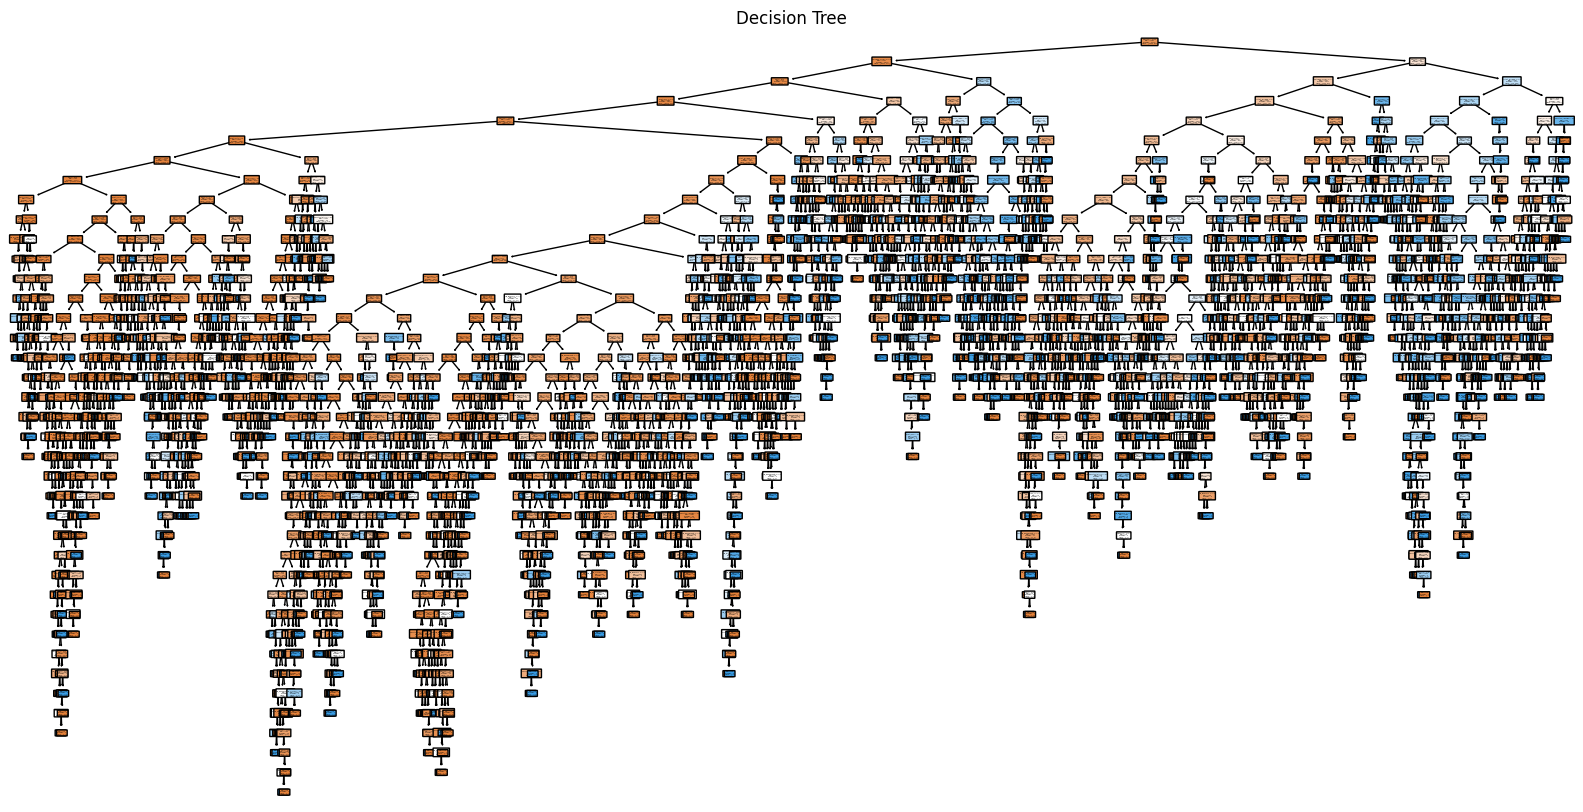

In [9]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree')
plt.show()
